# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## TODO:

- [x] completed all of the code implementations
- [x] code cells need to have been run so that reviewers can see the final implementation and output
- [x] finalize your work by exporting the iPython Notebook as an HTML document
- [x] a writeup to complete either a markdown file or a pdf document following the Rubric points
- [x] adding requirements for enhancing the project beyond the minimum requirements
- [x] discuss the additional results in the writeup file

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from random import shuffle

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
assert(len(X_train) == len(y_train))

X_valid, y_valid = valid['features'], valid['labels']
assert(len(X_valid) == len(y_valid))


X_test, y_test = test['features'], test['labels']
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

- [x] Complete the basic data summary

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image? It is (32, 32, 3) -> (width, height, depth)
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

- [x] Basic exploratory and visulizations of the dataset
- [x] the distribution of classes in the training, validation and test set **Distribution is same for most classes**

### A. Dataset Visualization

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
def dataset_visualizer(x, y, labels, n_classes = 43):
    """Visualizations of the traffic sign dataset"""
    plt.figure(figsize=(25, 25))
    plt.subplots_adjust( hspace=.4, wspace=.4 )

    for i in range(0, n_classes):
        plt.subplot(9, 5, i + 1)
        for j in range(len(y)):
            if i == y[j]:
                img = x[j]
                break

        plt.imshow(img.squeeze()) 
        plt.title(str(labels.loc[y[j], 'SignName']), fontsize=16)
        plt.axis('off')
    plt.show()
    return plt

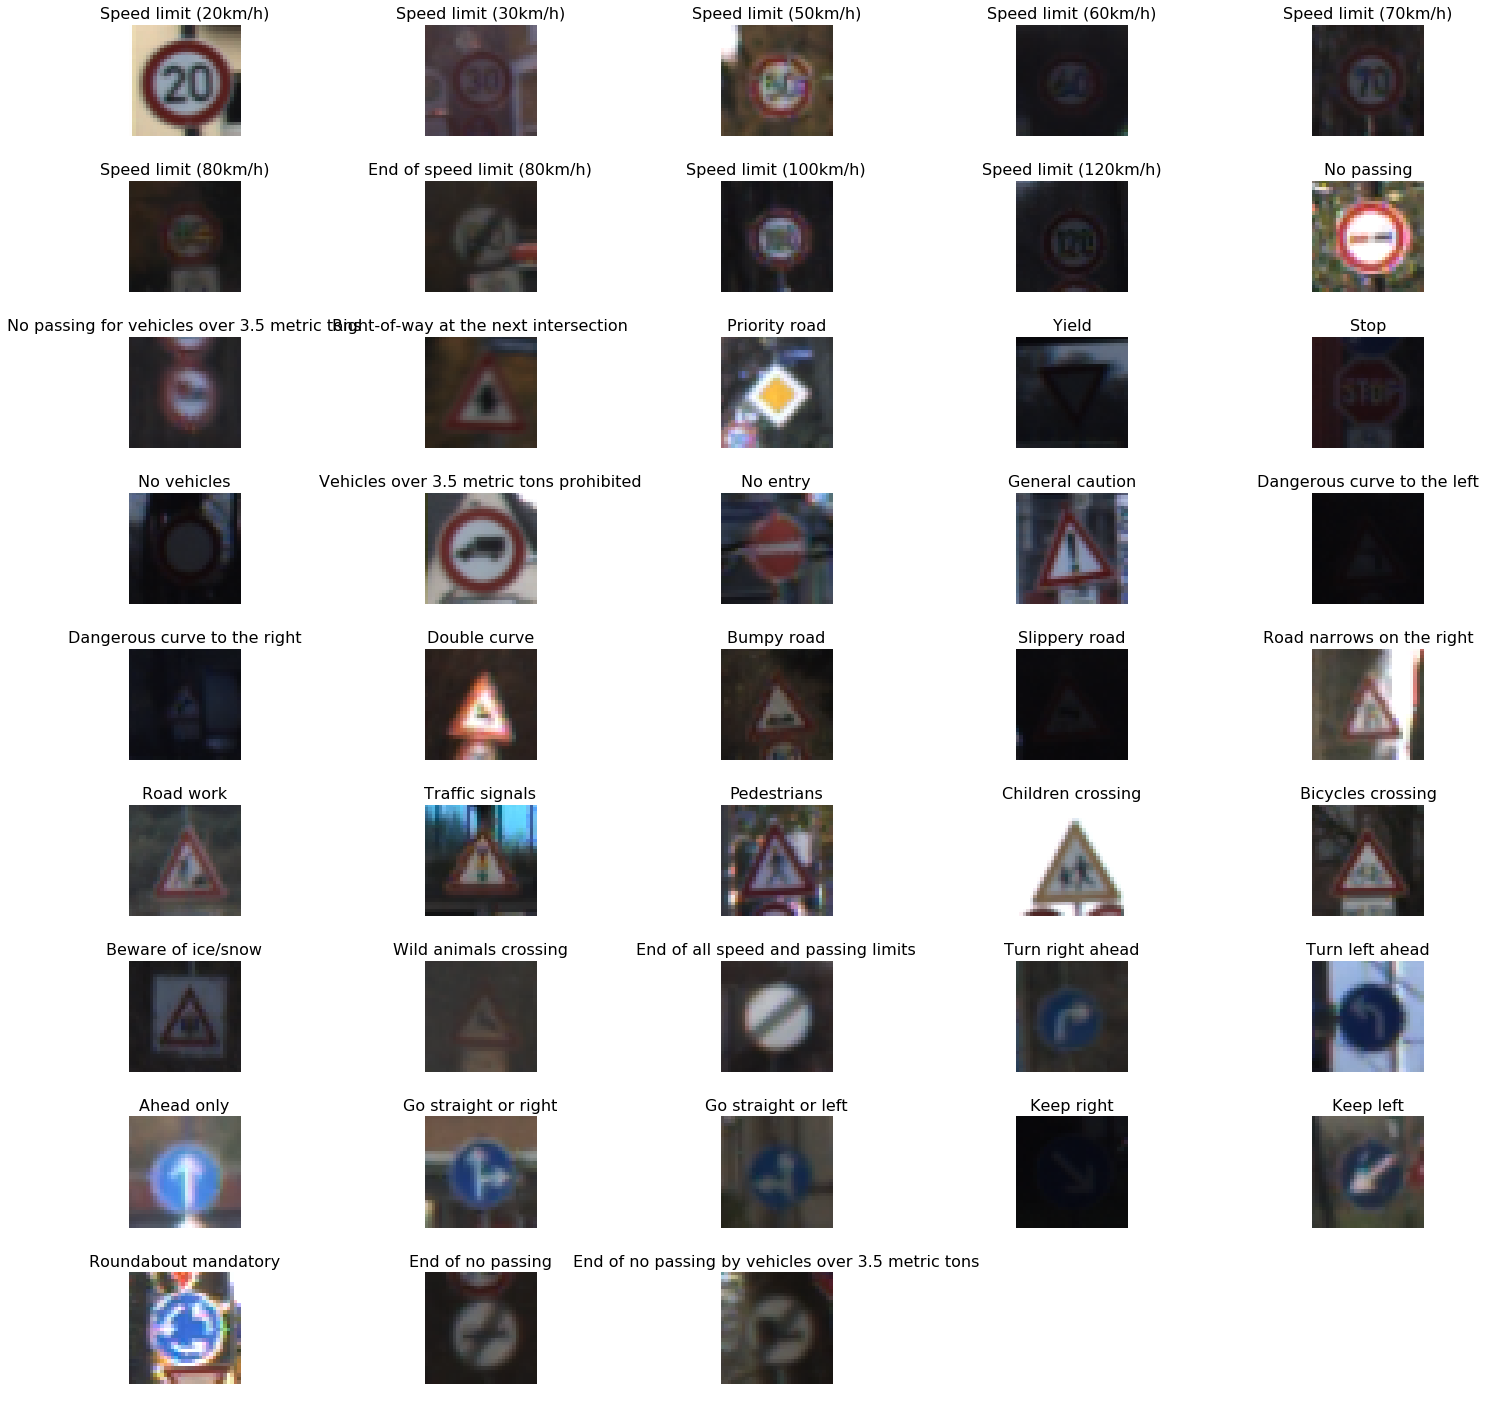

In [5]:
labels = pd.read_csv('signnames.csv')
plt = dataset_visualizer(X_train, y_train, labels, n_classes)
plt.savefig('artifacts/Traffic Dataset Visualization.png')

### B. Exploratory Analysis

In [6]:
def get_distribution(y, STR, fc, num_bins = 100):
    print()
    plt.figure()
    n, bins, patches = plt.hist(y, num_bins, facecolor = fc, alpha=0.5)
    plt.xlabel('Class Labels', fontsize=15)
    plt.ylabel('Number of Examples', fontsize=15)
    plt.title("Data Distribution of " + STR + " set", fontsize=20)
    plt.savefig('artifacts/Data Distribution of ' + STR + ' set.png')
    plt.show()

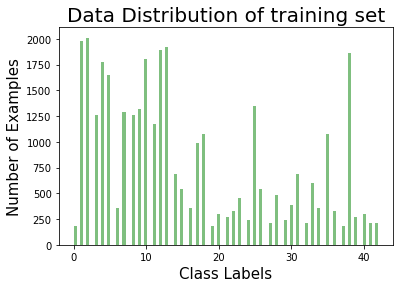

In [27]:
# print distribution of traffic signs in training set
get_distribution(y_train, STR ="training", fc = 'green')

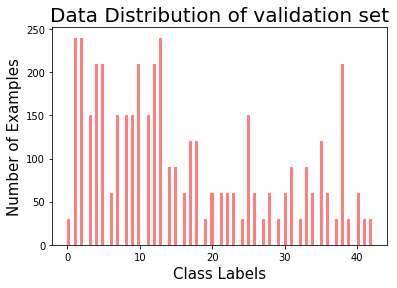

In [28]:
# print distribution of traffic signs in validation set
get_distribution(y_valid, STR = "validation", fc = 'red')

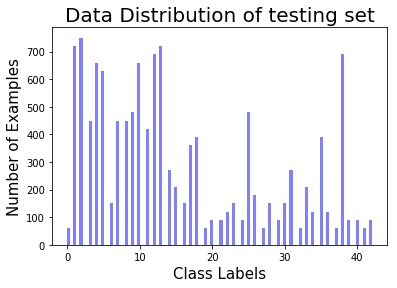

In [29]:
# print distribution of traffic signs in testing set
get_distribution(y_test, STR = "testing", fc = 'blue')

> Looking at the distributions graphs above for training, validation and testing - they seem to be almost similar. hence we can conclude that validation and testing set are a good representative (proxy) of the training dataset.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- [x] Neural network architecture (is the network over or underfitting?)
- [x] Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- [x] Number of examples per label (some have more than others).
- [x] Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### A. Preprocessing RGB images

- Converting RGB images to Gray images
- Converting Gray images to Scaled / Normalized images
- Converting Scaled Images to Contrast Stretched Images

#### Note
> Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 
> Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 
> Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
import random
from skimage import exposure
import matplotlib.image as mpimg

def rgb2gray(img):
    """rgb to gray conversion calculation"""
    gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    return gray

def get_gray_images(X):
    """convert RGB images into grayscale"""
    X_gray = []
    for i in range(len(X)):
        gray = rgb2gray(X[i])
        X_gray.append(np.stack((gray,)*1, axis=2))
    assert(len(X) == len(X_gray)) 
    return X_gray

def get_scaled_images(X):
    """scaling the images"""
    X_scale = []
    for i in range(len(X)):
        X_scale.append(( X[i] - 128 ) / 128)
    assert(len(X) == len(X_scale))
    return X_scale

def get_exposed_images(X):
    """Contrast stretching"""
    X_expo = []
    for i in range(len(X)):
        X_expo.append(exposure.rescale_intensity(X[i]))
    assert(len(X) == len(X_expo))
    return X_expo

def plot_image_comparison(X, Y, k = 10):
    """Plot original image "X" and corresponding grayscale image "Y". Pick K images randomly"""
    count = 1
    f, axarr = plt.subplots(k, 2, figsize=(32, 32))
    
    # generate k indices for image to plot
    indices = random.sample(range(0, n_train), k)
    
    for i in range(len(indices)):
        image = X[indices[i]].squeeze()
        gray = Y[indices[i]].squeeze()
        plt.subplot(k, 2, count)
        plt.imshow(image)
        plt.subplot(k, 2, count + 1)
        plt.imshow(gray, cmap = plt.get_cmap('gray'))
        count+=2
    plt.axis('off')
    plt.show()
    return plt

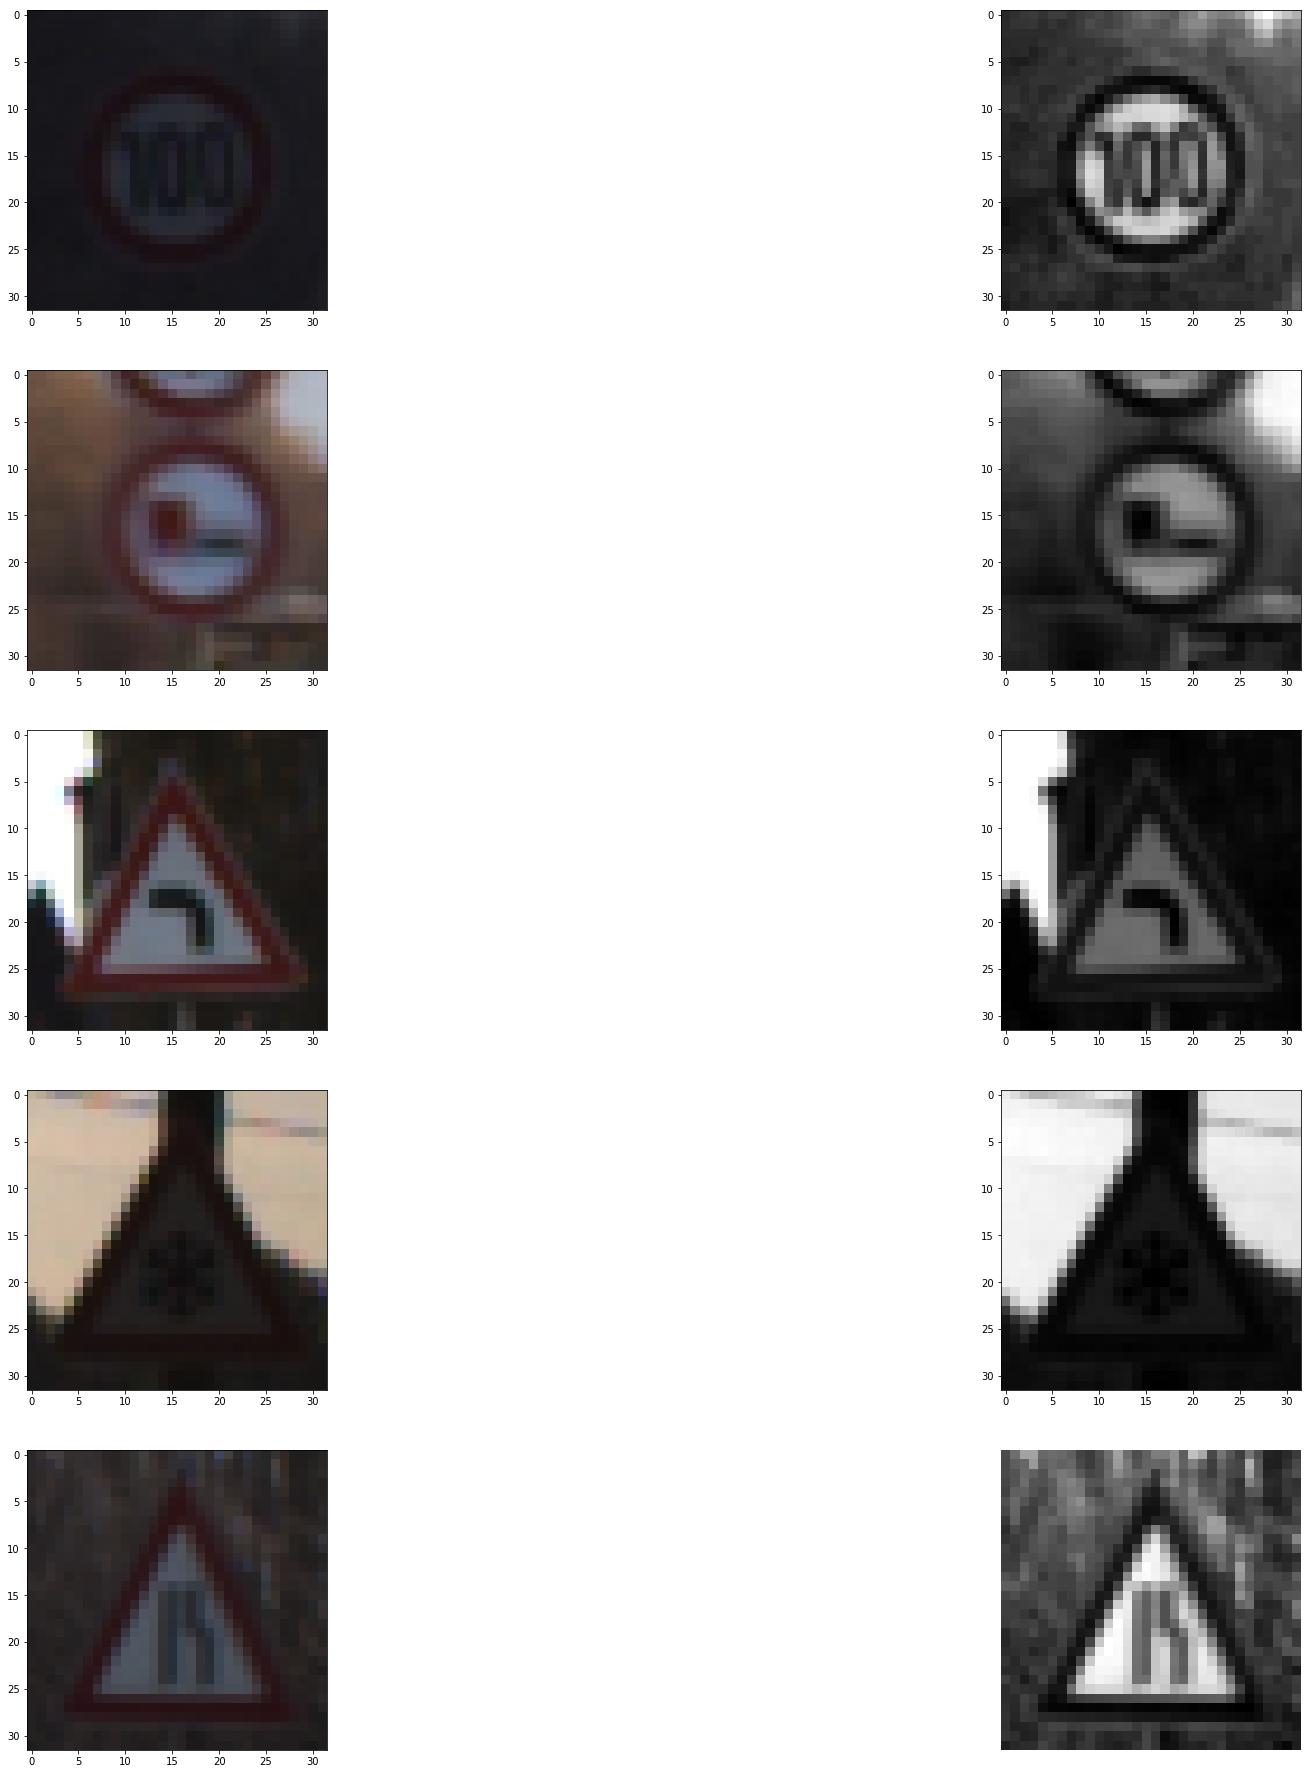

In [7]:
# Converting RGB training images to gray images
X_train_gray = get_gray_images(X_train)

# Comparing images before and after gray scaling
plt = plot_image_comparison(X_train, X_train_gray, 5)
plt.savefig('artifacts/X_train_grayscaled_images.png')

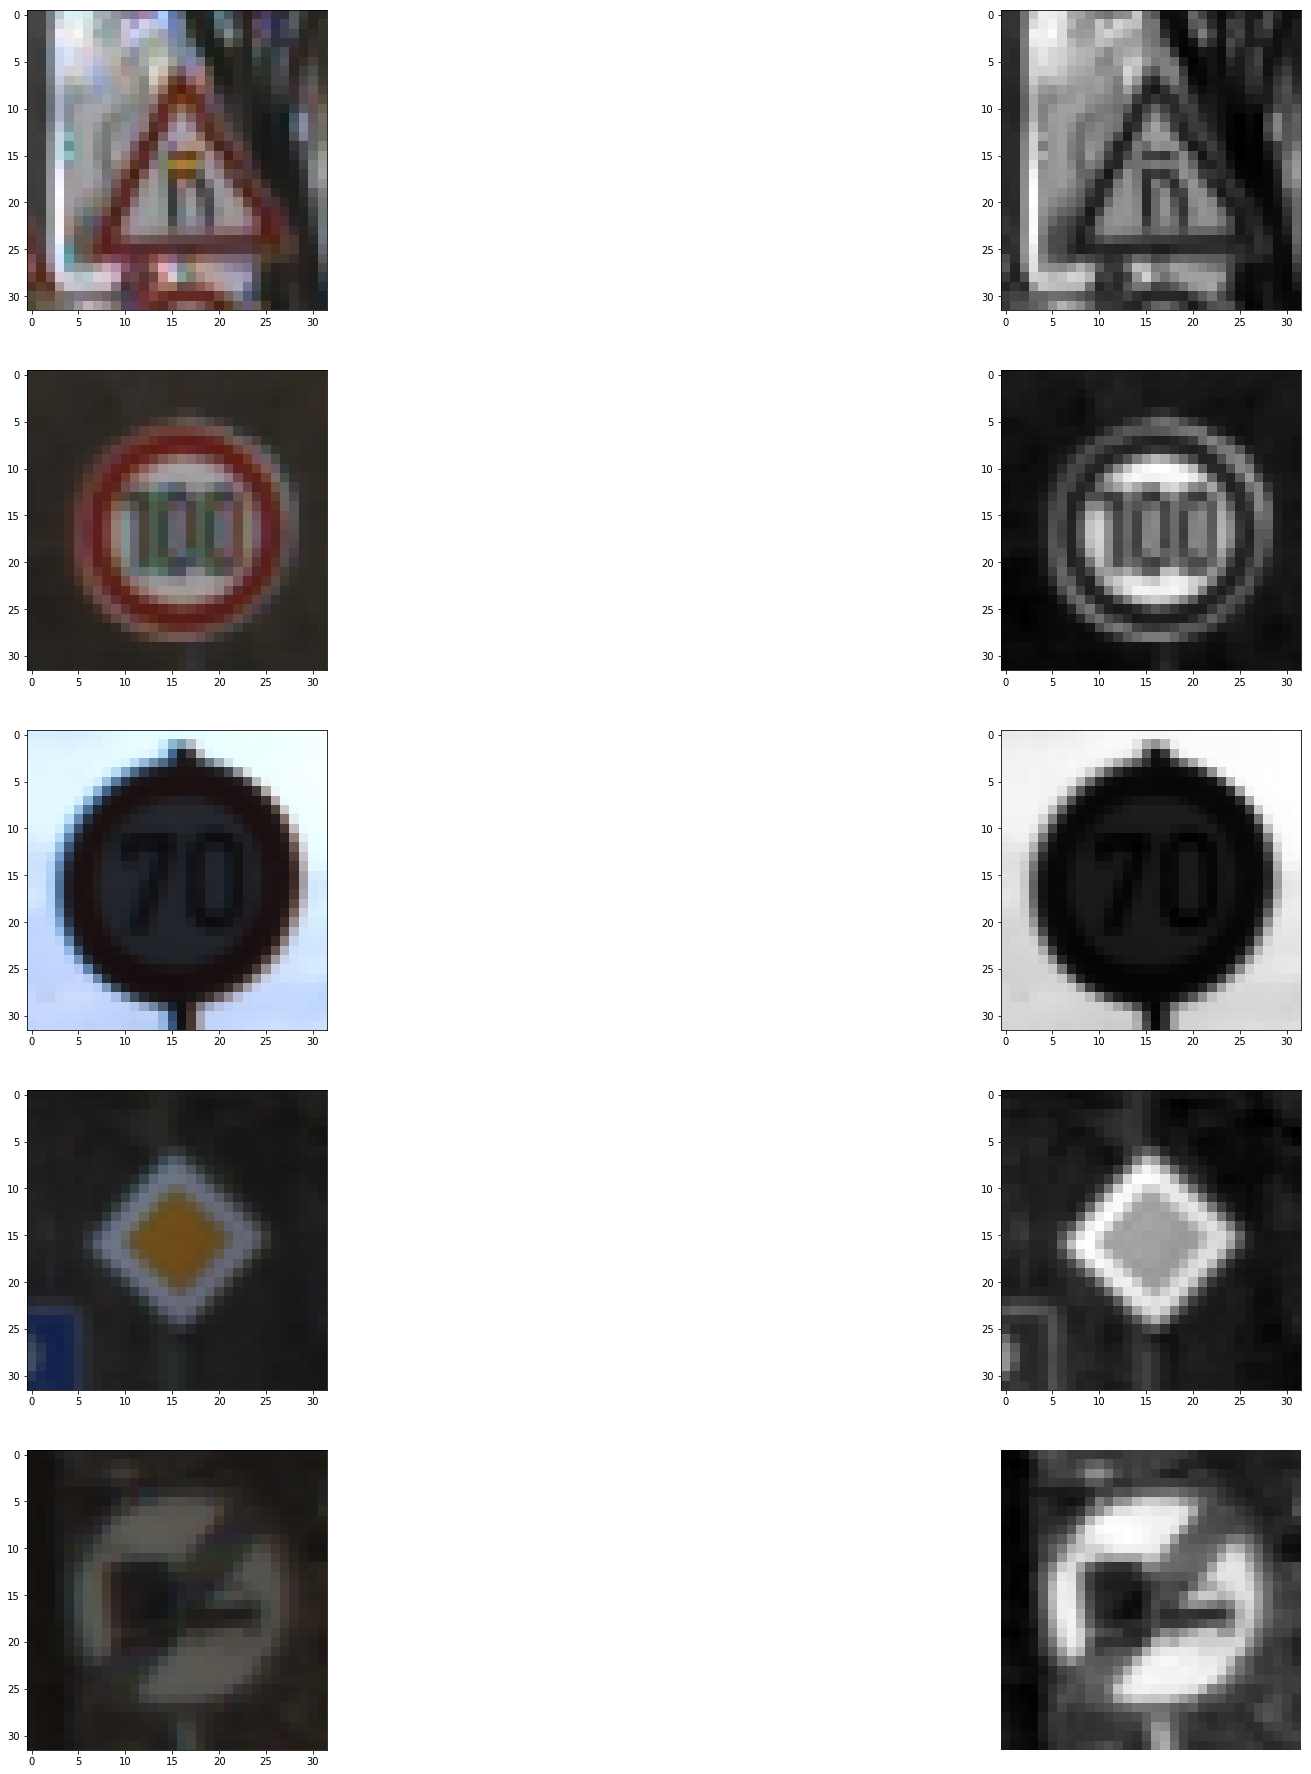

In [8]:
# Converting gray training images to scaled images
X_train_scale = get_scaled_images(X_train_gray)

# Comparing images before and after scaling
plt = plot_image_comparison(X_train, X_train_scale, 5)
plt.savefig('artifacts/X_train_normalized_images.png')

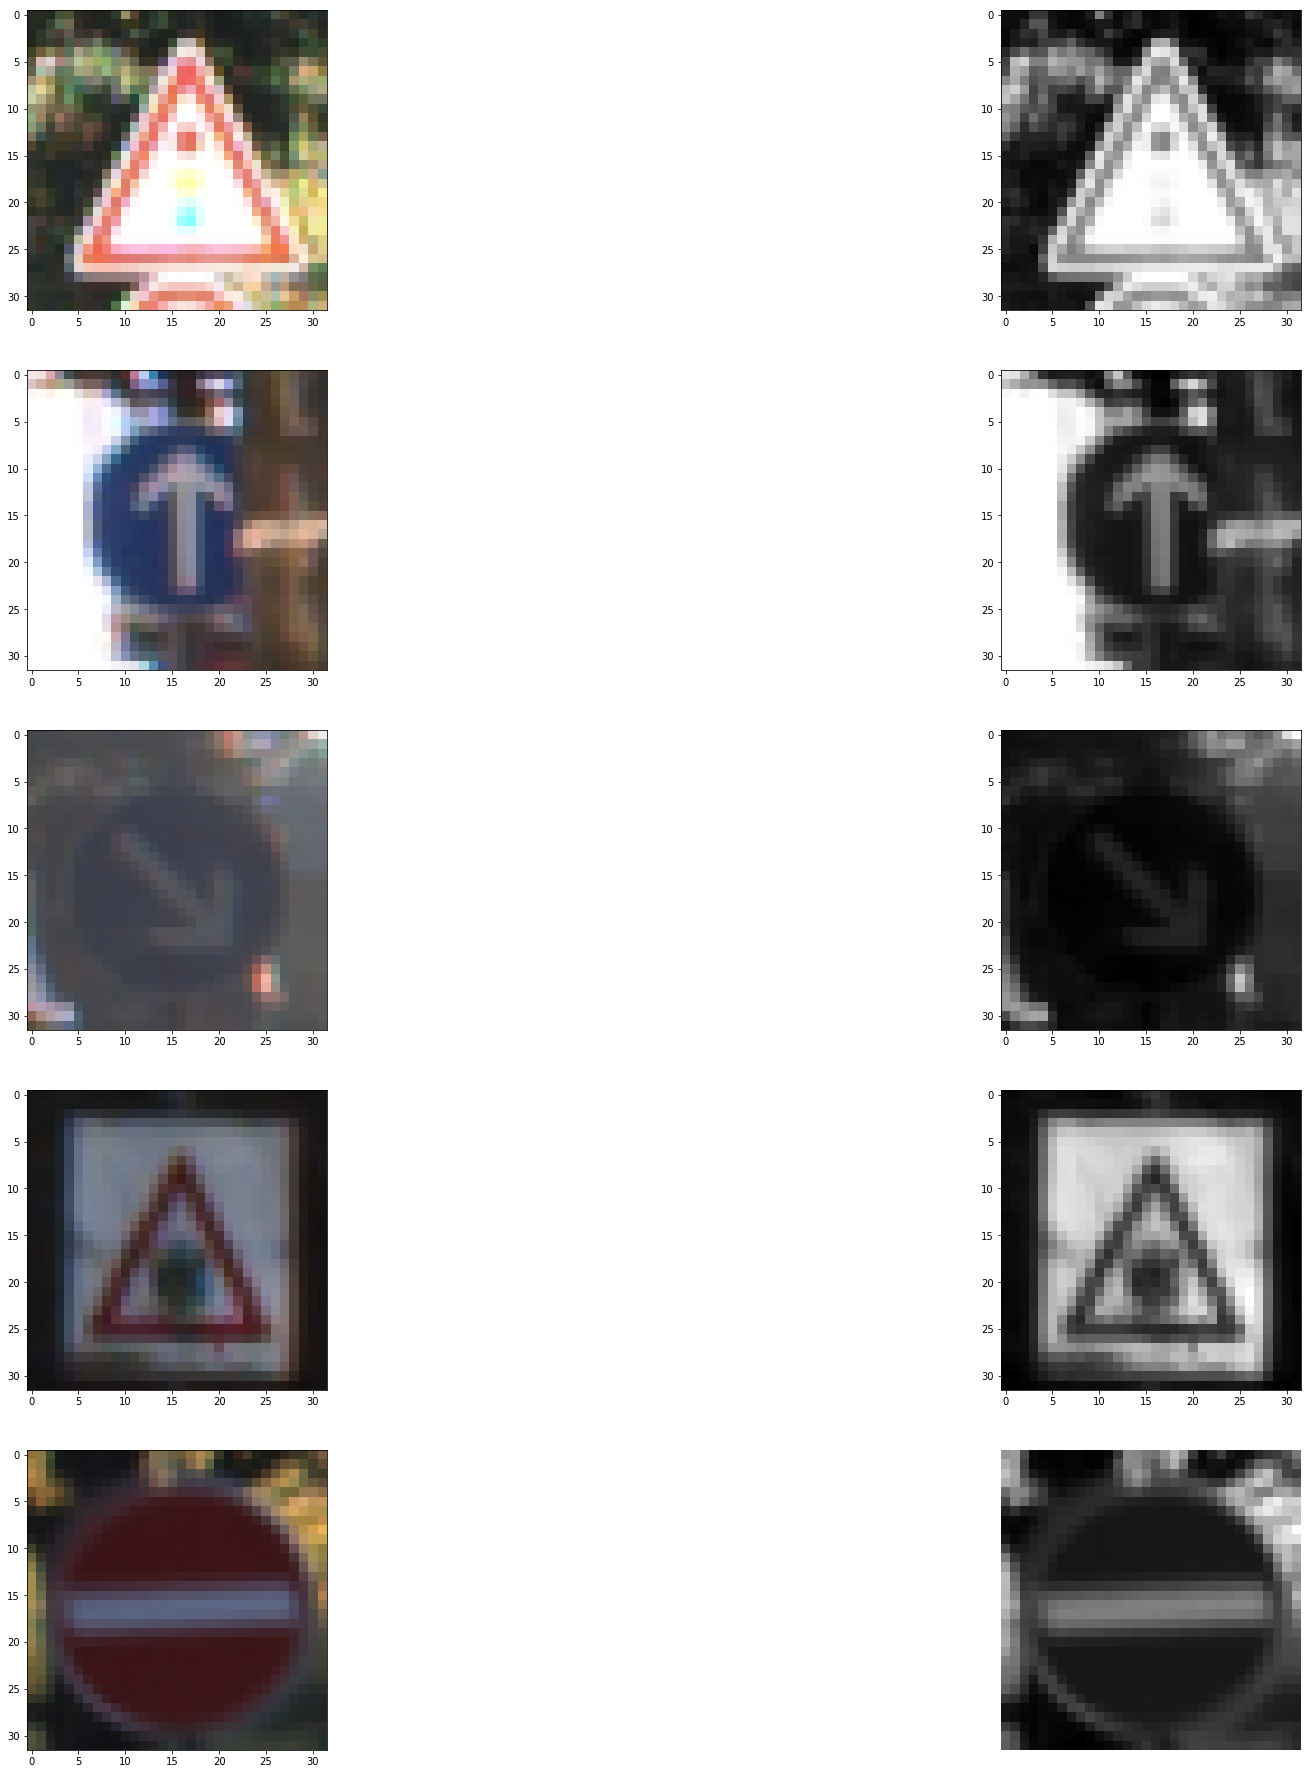

In [9]:
# Converting scaled training images to contrast stretched images
X_train_expo = get_exposed_images(X_train_scale)

# Comparing images before and after contrast stretching
plt = plot_image_comparison(X_train, X_train_expo, 5)
plt.savefig('artifacts/X_train_contrast_streched_images.png')

In [10]:
# Converting RGB validation images to grayscale
X_valid_gray = get_gray_images(X_valid)

# Converting gray validation images to scaled images
X_valid_scale = get_scaled_images(X_valid_gray)

# Converting scaled validation images to contrast stretched images
X_valid_expo = get_exposed_images(X_valid_scale)

In [11]:
# Converting RGB testing images to grayscale
X_test_gray = get_gray_images(X_test)

# Converting gray testing images to scaled images
X_test_scale = get_scaled_images(X_test_gray)

# Converting scaled testing images to contrast stretched images
X_test_expo = get_exposed_images(X_test_scale)

### B. Reading through Labels of training dataset

In [12]:
img_per_class = np.zeros(n_classes)

# count number of image in each category
for i in range(0, len(y_train)):
    img_per_class[y_train[i]] += 1

# print statistic info
for i in range(0, n_classes):
    print("No. of Images in class {:2d}".format(i), " : " + str(img_per_class[i]),
          "\t Traffic Signal Label : " + labels.loc[i, 'SignName'], )

No. of Images in class  0  : 180.0 	 Traffic Signal Label : Speed limit (20km/h)
No. of Images in class  1  : 1980.0 	 Traffic Signal Label : Speed limit (30km/h)
No. of Images in class  2  : 2010.0 	 Traffic Signal Label : Speed limit (50km/h)
No. of Images in class  3  : 1260.0 	 Traffic Signal Label : Speed limit (60km/h)
No. of Images in class  4  : 1770.0 	 Traffic Signal Label : Speed limit (70km/h)
No. of Images in class  5  : 1650.0 	 Traffic Signal Label : Speed limit (80km/h)
No. of Images in class  6  : 360.0 	 Traffic Signal Label : End of speed limit (80km/h)
No. of Images in class  7  : 1290.0 	 Traffic Signal Label : Speed limit (100km/h)
No. of Images in class  8  : 1260.0 	 Traffic Signal Label : Speed limit (120km/h)
No. of Images in class  9  : 1320.0 	 Traffic Signal Label : No passing
No. of Images in class 10  : 1800.0 	 Traffic Signal Label : No passing for vehicles over 3.5 metric tons
No. of Images in class 11  : 1170.0 	 Traffic Signal Label : Right-of-way at 

### C. Shuffle the dataset

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_expo, y_train)
X_validation, y_validation = shuffle(X_valid_expo, y_valid)
X_test, y_test = shuffle(X_test_expo, y_test)

### Model Architecture

In [14]:
# Importing tensorflow
import tensorflow as tf

# Initializing features and labels as tensors
x = tf.placeholder(tf.float32, (None, X_train[0].shape[0], X_train[0].shape[1], 1))
y = tf.placeholder(tf.int32, (None))

# Applying one-hot encoding to the class labels
one_hot_y = tf.one_hot(y, n_classes)

In [15]:
mu = 0
sigma = 0.1
dropout = 0.75
EPOCHS = 50
BATCH_SIZE = 256

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 64), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape = (5, 5, 64, 32), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape = (800, 120), mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape = (84, n_classes), mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros(64)),
    'bc2': tf.Variable(tf.zeros(32)),
    'bd1': tf.Variable(tf.zeros(120)),
    'bd2': tf.Variable(tf.zeros(84)),
    'out': tf.Variable(tf.zeros(n_classes))}

In [36]:
# LENET Model Architecture
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def LeNet(x, weights, biases, mu, sigma, dropout):
    """
    LeNet Architecture for Multi-Class Object Detection
    
    """
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. Pooling: Output = 14x14x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    
    # Layer 2: Convolutional. Iutput = 14x14x6. Output = 10x10x16. Pooling: Output = 5x5x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits, conv1, conv2, fc1, fc2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

- [x] Train your model here.
- [x] Calculate and report the accuracy on the training and validation set.
- [x] Tuning the final model architecture 
- [x] the accuracy on the test set should be calculated and reported.

In [42]:
# Training pipeline
rate = 0.001

logits, conv1, conv2, fc1, fc2 = LeNet(x, weights, biases, mu, sigma, dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [64]:
# Training and saving the Model
saver = tf.train.Saver()
valid_plot, train_plot = [], []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCH {} ...".format(i+1))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        valid_plot.append(validation_accuracy)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        train_accuracy = evaluate(X_train, y_train)
        train_plot.append(train_accuracy)
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.684
Train Accuracy = 0.743

EPOCH 2 ...
Validation Accuracy = 0.819
Train Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.871
Train Accuracy = 0.926

EPOCH 4 ...
Validation Accuracy = 0.893
Train Accuracy = 0.952

EPOCH 5 ...
Validation Accuracy = 0.902
Train Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.910
Train Accuracy = 0.964

EPOCH 7 ...
Validation Accuracy = 0.917
Train Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.926
Train Accuracy = 0.978

EPOCH 9 ...
Validation Accuracy = 0.928
Train Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.935
Train Accuracy = 0.984

EPOCH 11 ...
Validation Accuracy = 0.942
Train Accuracy = 0.986

EPOCH 12 ...
Validation Accuracy = 0.934
Train Accuracy = 0.985

EPOCH 13 ...
Validation Accuracy = 0.938
Train Accuracy = 0.989

EPOCH 14 ...
Validation Accuracy = 0.945
Train Accuracy = 0.989

EPOCH 15 ...
Validation Accuracy = 0.937
Train Accuracy = 0.989

EPOCH 16 ...
Validati

In [65]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.943


In [64]:
def plot_accuracy_comparision(EPOCHS, valid_plot, train_plot, test_accuracy):
    # Data
    df=pd.DataFrame({'epochs': range(1,EPOCHS+1), 'Validation Accuracy': valid_plot, 'Training Accuracy': train_plot, 'Test accuracy': test_accuracy }) #

    plt.xlabel('No. of training epochs', fontsize=15)
    plt.ylabel('Training / Validation accuracy', fontsize=15)
    plt.title('Model LeNet Training Pipeline', fontsize=20)

    # multiple line plot
    plt.plot( 'epochs', 'Validation Accuracy', data=df, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
    plt.plot( 'epochs', 'Training Accuracy', data=df, marker='*', markerfacecolor='green', markersize=8, color='lightgreen', linewidth=2)
    plt.plot( 'epochs', 'Test accuracy', data=df, marker='', color='red', linewidth=2, linestyle='solid')
    plt.savefig('artifacts/Model lenet training performance.png')
    plt.legend()

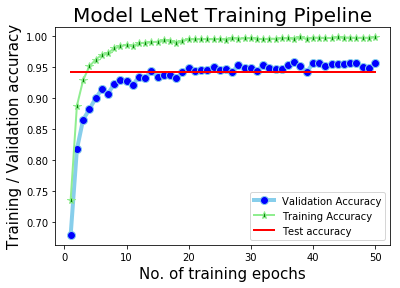

In [65]:
plot_accuracy_comparision(EPOCHS, valid_plot, train_plot, test_accuracy)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, 
- [X] download at least five pictures of German traffic signs from the web
- [X] use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### A. Load and Output the Images

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from skimage import data
from skimage.transform import resize

def plot_test_images(load_images):
    plt.figure(figsize=(20,20))
    columns = 5
    for i, image in enumerate(load_images):
        plt.subplot(len(load_images) / columns + 1, columns, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()
    return plt

def resize_images(images):
    load_images = []
    new_images = []
    for image in images:
        # skip non-png file
        if "png" not in image: 
            continue
        else:
            # process png images
            filename = os.path.join("test_images/", image)
            img = mpimg.imread(filename)
            load_images.append(img)
            # resize into (32x32) size
            img = resize(img, (32, 32), mode='reflect')
            new_images.append(img)
    return load_images, new_images

['14-stop.png', '33-turn_right_ahead.png', '15-no-vechicles.png', '12-priority-road.png', '.ipynb_checkpoints', '22-bumpy-road.png']


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  

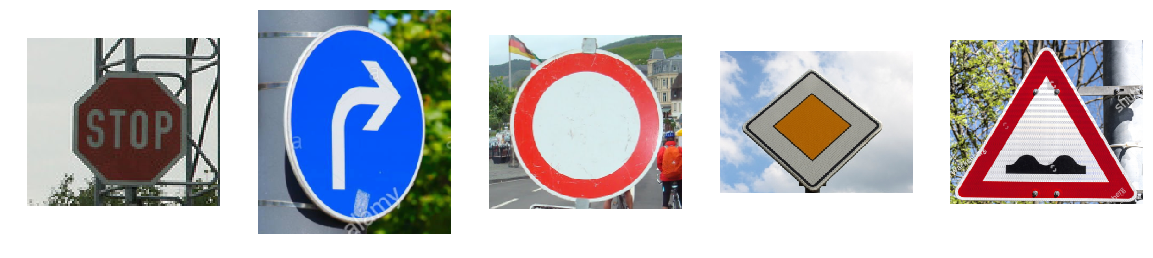

In [23]:
images=os.listdir("test_images/")
print(images)

load_images, new_images = resize_images(images)
plt = plot_test_images(load_images)
plt.savefig('artifacts/Actual test images.png')
plt.show()

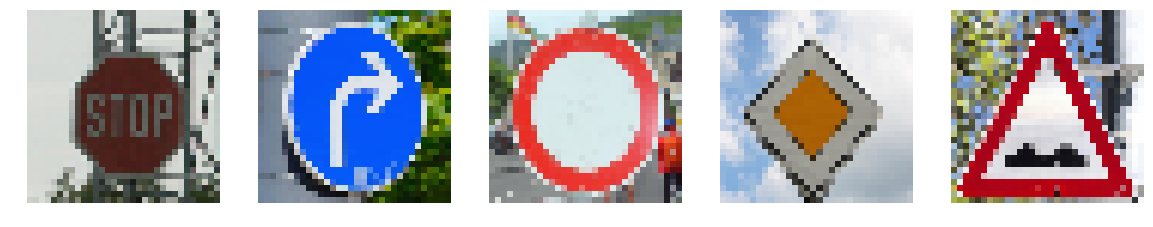

In [24]:
plt = plot_test_images(new_images)
plt.savefig('artifacts/Re-scaled test images.png')
plt.show()

### B. Predict the Sign Type for Each Image

- [X] Run the predictions here and use the model to output the prediction and accuracy for each image.
- [X] Make sure to pre-process the images with the same pre-processing pipeline used earlier.

For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [25]:
def preprocess_test_image(new_images, img_processed):
    for i in range(len(new_images)):
        
        # Converting RGB testing images to grayscale
        test_img = rgb2gray(new_images[i])
        test_img = np.stack((test_img,)*1, axis=2)
        
        # Converting gray testing images to scaled images
        test_img = (( test_img - 128 ) / 128)

        # Converting scaled testing images to contrast stretched images
        test_img = exposure.rescale_intensity(test_img)

        # add into list
        img_processed.append(test_img)
        
    return img_processed

def get_predictions(img_processed, img_label):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        prediction = sess.run(tf.argmax(logits, axis = 1), feed_dict={x: img_processed, y: img_label})
        print(prediction)
    return prediction

def plot_predictions(load_images, labels):
    # plot figures with prediction result
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust( hspace=.4, wspace=.4 )
    for i in range(0, len(load_images)):
        plt.subplot(3, 2, i + 1)
        plt.imshow(load_images[i].squeeze()) 
        plt.title("prediction:="+ str(labels.loc[prediction[i], 'SignName']) 
                  + " \t  true label:=" + str(labels.loc[img_label[i], 'SignName']) , fontsize=12)
        plt.axis('off')
    plt.savefig('artifacts/Predictions on pre-processsed test images.png')
    plt.show()
    return

def analyze_performance(prediction, img_label):
    assert len(prediction) == len(img_label)
    num_correct = 0
    for i, j in zip(prediction, img_label):
        if i == j:
            num_correct += 1
    test_accuracy = num_correct / len(prediction) 
    return test_accuracy

INFO:tensorflow:Restoring parameters from ./lenet
[14 33 15 12 22]


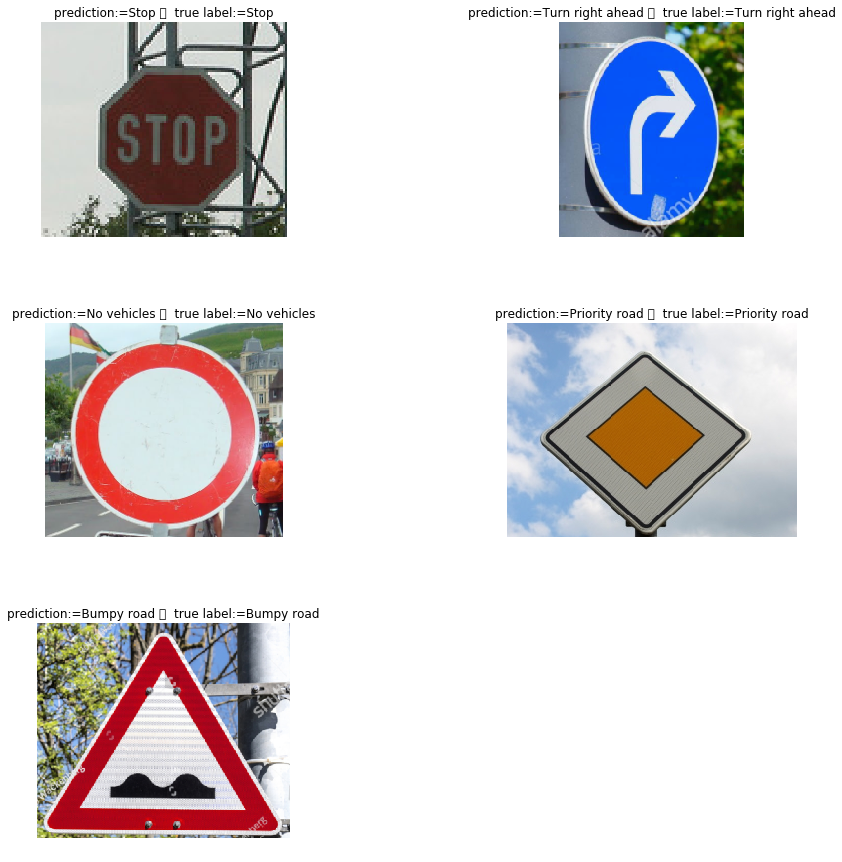

In [70]:
# Pre-processing images
img_processed = []
img_processed = preprocess_test_image(new_images, img_processed)

# Set label for those new images
img_label = np.array([14, 33, 15, 12, 22])

# Detect the signs in the images
prediction = get_predictions(img_processed, img_label)
    
# Plot the predicted predictions
plot_predictions(load_images, labels)

### C. Analyze Performance

In [76]:
# Analyze performance on test images
test_accuracy = 100 * analyze_performance(prediction, img_label)
print("Test Accuracy = {:.3f} %".format(test_accuracy))

Test Accuracy = 100.000 %


### D. Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def print_probabilities(prediction, probability, new_images, labels):
    for i, (preds, probs, image) in enumerate(zip(prediction, probability, new_images)):
        print('-' * 60) 
        print('\033[1m')
        correct = labels.loc[img_label[i], 'SignName']
        print('\t True Label is: = {:>5}:{:<30}'.format(img_label[i], correct))
        print('\033[0m')
        for res, p in zip(preds, probs):
            name = labels.loc[res, 'SignName']
            print('{:>5}: {:<30} {:>3.3f}%'.format(res, name, p*100.0))
        print('-' * 60)

def plot_bar(names, prob, correct):
    # this is for plotting purpose
    index = np.arange(len(names))
    plt.bar(index, prob)
    plt.xlabel('Class Labels', fontsize=10)
    plt.ylabel('Softmax Probability for test image', fontsize=10)
    plt.xticks(index, names, fontsize=10, rotation=90)
    plt.title('True Label is ' + str(correct))
    plt.savefig('artifacts/Softmax Probabilities Distribution for '+ str(correct)+'.png')
    plt.show()
    
def softmax_probability_bar_chart(prediction, probability, new_images, labels):
    for i, (preds, probs, image) in enumerate(zip(prediction, probability, new_images)):
        correct = labels.loc[img_label[i], 'SignName']
        print("Softmax Probability Distribution")
        probab, names = [], []
        for res, p in zip(preds, probs):
            name = labels.loc[res, 'SignName']
            probab.append(p)
            names.append(name)
        plot_bar(names, probab, correct)

def top_softmax_probabilities(img_processed, img_label):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        result = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: img_processed, y: img_label})

    prediction = result[1]
    probability = result[0]
    return probability, prediction

In [32]:
# Calculate the top 5 softmax probabilities for each test images
probability, prediction = top_softmax_probabilities(img_processed, img_label)

INFO:tensorflow:Restoring parameters from ./lenet


Softmax Probability Distribution


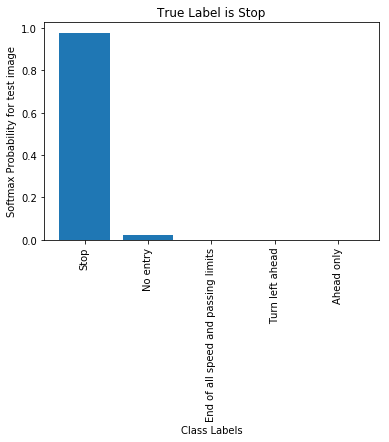

Softmax Probability Distribution


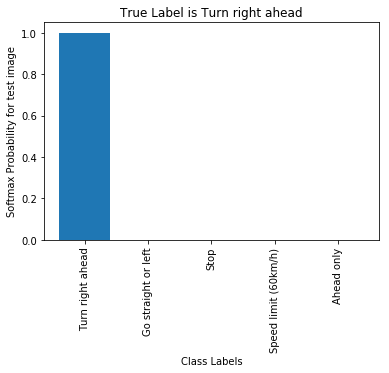

Softmax Probability Distribution


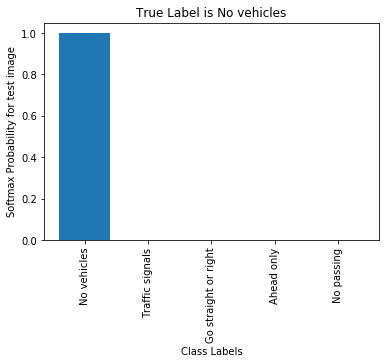

Softmax Probability Distribution


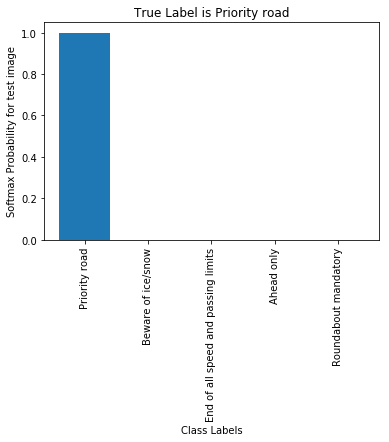

Softmax Probability Distribution


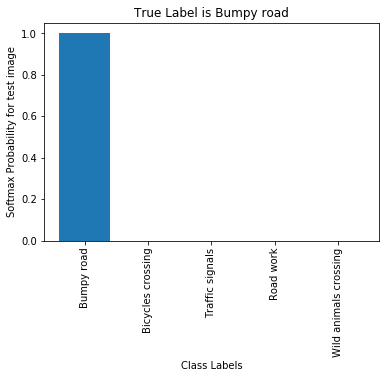

In [127]:
softmax_probability_bar_chart(prediction, probability, new_images, labels)

In [110]:
# Printing the softmax probabilities
print_probabilities(prediction, probability, new_images, labels)

INFO:tensorflow:Restoring parameters from ./lenet
------------------------------------------------------------

	 True Label is: =    14:Stop                          

   14: Stop                           99.969%
   17: No entry                       0.031%
   32: End of all speed and passing limits 0.000%
   34: Turn left ahead                0.000%
   35: Ahead only                     0.000%
------------------------------------------------------------
------------------------------------------------------------

	 True Label is: =    33:Turn right ahead              

   33: Turn right ahead               100.000%
   37: Go straight or left            0.000%
   14: Stop                           0.000%
    3: Speed limit (60km/h)           0.000%
   35: Ahead only                     0.000%
------------------------------------------------------------
------------------------------------------------------------

	 True Label is: =    15:No vehicles                   

   15: No veh

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.
    


- [X] completed all of the code implementations
- [X] successfully answered each question above
- [X] finalize your work by exporting it to html document
- [X] writeup pdf file or markdown document
- [ ] Optional exercise for visualizating nn states - **Tried but failed to complete**

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [45]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [46]:
outputFeatureMap(x[11], conv2, activation_min=-1, activation_max=-1 ,plt_num=1)

RuntimeError: Attempted to use a closed Session.